In [23]:
import pandas as pd
import numpy as np
import operator
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
data = pd.read_csv('tmdb-movies.csv')
data

id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
...       ...        ...         ...        ...         ...   
10861      21  tt0060371    0.080598          0           0   
10862   20379  tt0060472    0.065543          0           0   
10863   39768  tt0060161    0.065141          0           0   
10864   21449  tt0061177    0.064317          0           0   
10865   22293  tt0060666    0.035919      19000           0   

                     original_title  \
0                    Jurassic World   
1                Mad Max: Fury Road   
2                         Insurgent   
3      Star Wars: The Force Awakens   
4                         Furious 7   
...                             ...   
10861            The Endless Summer   
10862                    Grand Prix   
10863           Beregis Avtomobilya   
10864        What's Up, Tiger Lily?   
10865      Manos: The Hands of Fate   

                                                    cast  \
0      Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1      Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2      Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3      Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4      Vin Diesel|Paul Walker|Jason Statham|Michelle ...   
...                                                  ...   
10861  Michael Hynson|Robert August|Lord 'Tally Ho' B...   
10862  James Garner|Eva Marie Saint|Yves Montand|Tosh...   
10863  Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...   
10864  Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...   
10865  Harold P. Warren|Tom Neyman|John Reynolds|Dian...   

                                                homepage            director  \
0                          http://www.jurassicworld.com/     Colin Trevorrow   
1                            http://www.madmaxmovie.com/       George Miller   
2         http://www.thedivergentseries.movie/#insurgent    Robert Schwentke   
3      http://www.starwars.com/films/star-wars-episod...         J.J. Abrams   
4                               http://www.furious7.com/           James Wan   
...                                                  ...                 ...   
10861                                                NaN         Bruce Brown   
10862                                                NaN  John Frankenheimer   
10863                                                NaN      Eldar Ryazanov   
10864                                                NaN         Woody Allen   
10865                                                NaN    Harold P. Warren   

                                                 tagline  ...  \
0                                      The park is open.  ...   
1                                     What a Lovely Day.  ...   
2                             One Choice Can Destroy You  ...   
3                          Every generation has a story.  ...   
4                                    Vengeance Hits Home  ...   
...                                                  ...  ...   
10861                                                NaN  ...   
10862  Cinerama sweeps YOU into a drama of speed and ...  ...   
10863                                                NaN  ...   
10864                          WOODY ALLEN STRIKES BACK!  ...   
10865       It's Shocking! It's Beyond Your Imagination!  ...   

                                                overview runtime  \
0      Twenty-two years after the events of Jurassic ...     124   
1      An apocalyptic story set in the furthest reach...     120   
2      Beatrice Prior must confront her inner demons ...     119   
3      Thirty years after defeating the Galactic E

In [25]:
data = pd.read_csv('tmdb-movies.csv')
null_counts = data.isnull().sum()
null_counts

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [26]:
print(data.shape)
print(list(data.columns.values))

(10866, 21)
['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']


In [27]:
data.head(2)

id    imdb_id  popularity     budget     revenue      original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810      Jurassic World   
1   76341  tt1392190   28.419936  150000000   378436354  Mad Max: Fury Road   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   

                        homepage         director             tagline  ...  \
0  http://www.jurassicworld.com/  Colin Trevorrow   The park is open.  ...   
1    http://www.madmaxmovie.com/    George Miller  What a Lovely Day.  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  

[2 rows x 21 columns]

In [34]:
columns_to_check = ['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']
data_cleaned = data.dropna(subset=columns_to_check)
data_cleaned

id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
...       ...        ...         ...        ...         ...   
10724     668  tt0064757    1.778746    7000000    81974493   
10759     948  tt0077651    1.198849     300000    70000000   
10760    8469  tt0077975    1.157930    2700000   141000000   
10817   13963  tt0077838    0.064029          0      321952   
10819   16214  tt0077696    0.044675          0    78000000   

                        original_title  \
0                       Jurassic World   
1                   Mad Max: Fury Road   
2                            Insurgent   
3         Star Wars: The Force Awakens   
4                            Furious 7   
...                                ...   
10724  On Her Majesty's Secret Service   
10759                        Halloween   
10760                     Animal House   
10817                   The Last Waltz   
10819                           Hooper   

                                                    cast  \
0      Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1      Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2      Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3      Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4      Vin Diesel|Paul Walker|Jason Statham|Michelle ...   
...                                                  ...   
10724  George Lazenby|Diana Rigg|Telly Savalas|Gabrie...   
10759  Donald Pleasence|Jamie Lee Curtis|P.J. Soles|N...   
10760  John Belushi|Tim Matheson|John Vernon|Verna Bl...   
10817  Robbie Robertson|Rick Danko|Levon Helm|Richard...   
10819  Burt Reynolds|Robert Klein|Adam West|Jan-Micha...   

                                                homepage          director  \
0                          http://www.jurassicworld.com/   Colin Trevorrow   
1                            http://www.madmaxmovie.com/     George Miller   
2         http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3      http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                               http://www.furious7.com/         James Wan   
...                                                  ...               ...   
10724  http://www.mgm.com/view/movie/1411/On-Her-Maje...     Peter R. Hunt   
10759  http://www.theofficialjohncarpenter.com/hallow...    John Carpenter   
10760                        http://www.animalhouse.com/       John Landis   
10817  http://www.mgm.com/#/our-titles/1092/The-Last-...   Martin Scorsese   
10819         http://en.wikipedia.org/wiki/Hooper_(film)       Hal Needham   

                                                 tagline  ...  \
0                                      The park is open.  ...   
1                                     What a Lovely Day.  ...   
2                             One Choice Can Destroy You  ...   
3                          Every generation has a story.  ...   
4                                    Vengeance Hits Home  ...   
...                                                  ...  ...   
10724  Far up! Far out! Far more! James Bond 007 is b...  ...   
10759                            The Night HE Came Home!  ...   
10760  It was the Deltas against the rules... the rul...  ...   
10817  It Started as a Concert. It Became a Celebration.  ...   
10819                       The greatest stuntman alive!  ...   

                                                overview runtime  \
0      Twenty-two years after the events of Jurassic ...     124   
1      An apocalyptic story set in the furthest reach...     120   
2      Beatrice Prior must confront her inner demons ...     119   
3      Thirty years after defeating th

In [35]:
data_cleaned.describe()

id   popularity        budget       revenue      runtime  \
count    1992.000000  1992.000000  1.992000e+03  1.992000e+03  1992.000000   
mean    71652.152108     1.316763  3.454924e+07  1.152153e+08   106.040161   
std     92355.883915     1.873563  5.061878e+07  2.202887e+08    29.234592   
min        11.000000     0.000620  0.000000e+00  0.000000e+00     0.000000   
25%      9699.000000     0.384079  0.000000e+00  0.000000e+00    92.000000   
50%     35112.500000     0.774223  1.500000e+07  2.578782e+07   102.000000   
75%     83573.000000     1.538639  4.800000e+07  1.278787e+08   116.000000   
max    414419.000000    32.985763  4.250000e+08  2.781506e+09   705.000000   

        vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  1992.000000   1992.000000   1992.000000  1.992000e+03  1.992000e+03  
mean    643.616968      6.178614   2007.796687  3.627376e+07  1.302391e+08  
std    1092.355998      0.881955      7.549224  5.129783e+07  2.564338e+08  
min      10.000000      2.100000   1961.000000  0.000000e+00  0.000000e+00  
25%      51.000000      5.600000   2006.000000  0.000000e+00  0.000000e+00  
50%     210.000000      6.200000   2010.000000  1.524601e+07  2.806370e+07  
75%     688.250000      6.800000   2012.000000  5.064450e+07  1.393645e+08  
max    9767.000000      8.300000   2015.000000  4.250000e+08  2.827124e+09

In [36]:
sum(data_cleaned.duplicated())

0

In [37]:
data_cleaned = pd.read_csv('data_cleaned.csv')
null_counts = data_cleaned.isnull().sum()
null_counts

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [40]:
data_cleaned['Profit'] = data_cleaned['revenue'] - data_cleaned['budget']
data_cleaned

<ipython-input-40-d28ab3a9c21e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Profit'] = data_cleaned['revenue'] - data_cleaned['budget']


id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
...       ...        ...         ...        ...         ...   
10724     668  tt0064757    1.778746    7000000    81974493   
10759     948  tt0077651    1.198849     300000    70000000   
10760    8469  tt0077975    1.157930    2700000   141000000   
10817   13963  tt0077838    0.064029          0      321952   
10819   16214  tt0077696    0.044675          0    78000000   

                        original_title  \
0                       Jurassic World   
1                   Mad Max: Fury Road   
2                            Insurgent   
3         Star Wars: The Force Awakens   
4                            Furious 7   
...                                ...   
10724  On Her Majesty's Secret Service   
10759                        Halloween   
10760                     Animal House   
10817                   The Last Waltz   
10819                           Hooper   

                                                    cast  \
0      Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1      Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2      Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3      Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4      Vin Diesel|Paul Walker|Jason Statham|Michelle ...   
...                                                  ...   
10724  George Lazenby|Diana Rigg|Telly Savalas|Gabrie...   
10759  Donald Pleasence|Jamie Lee Curtis|P.J. Soles|N...   
10760  John Belushi|Tim Matheson|John Vernon|Verna Bl...   
10817  Robbie Robertson|Rick Danko|Levon Helm|Richard...   
10819  Burt Reynolds|Robert Klein|Adam West|Jan-Micha...   

                                                homepage          director  \
0                          http://www.jurassicworld.com/   Colin Trevorrow   
1                            http://www.madmaxmovie.com/     George Miller   
2         http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3      http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                               http://www.furious7.com/         James Wan   
...                                                  ...               ...   
10724  http://www.mgm.com/view/movie/1411/On-Her-Maje...     Peter R. Hunt   
10759  http://www.theofficialjohncarpenter.com/hallow...    John Carpenter   
10760                        http://www.animalhouse.com/       John Landis   
10817  http://www.mgm.com/#/our-titles/1092/The-Last-...   Martin Scorsese   
10819         http://en.wikipedia.org/wiki/Hooper_(film)       Hal Needham   

                                                 tagline  ... runtime  \
0                                      The park is open.  ...     124   
1                                     What a Lovely Day.  ...     120   
2                             One Choice Can Destroy You  ...     119   
3                          Every generation has a story.  ...     136   
4                                    Vengeance Hits Home  ...     137   
...                                                  ...  ...     ...   
10724  Far up! Far out! Far more! James Bond 007 is b...  ...     142   
10759                            The Night HE Came Home!  ...      91   
10760  It was the Deltas against the rules... the rul...  ...     109   
10817  It Started as a Concert. It Became a Celebration.  ...     117   
10819                       The greatest stuntman alive!  ...     107   

                                          genres  \
0      Action|Adventure|Science Fiction|Thriller   
1      Action|Adventure|Science Fiction|Thriller   
2             Adventure|Science Fiction|Thriller   
3     

In [ ]:
# 1- Highest and Lowest Profitable Movies
if 'Profit' not in data.columns:
    # Calculate profit if not present
    data['Profit'] = data['revenue_adj'] - data['budget_adj']
def find_minmax(column_name):
    if column_name not in data.columns:
        raise ValueError(f"Column '{column_name}' does not exist in the DataFrame.")
    min_index = data[column_name].idxmin()
    max_index = data[column_name].idxmax()
    high = data.loc[max_index]
    low = data.loc[min_index]
    print(f"Movie with the highest {column_name}: {data['original_title'][max_index]}")
    print(f"Movie with the lowest {column_name}: {data['original_title'][min_index]}")
    return data.loc[[max_index, min_index], :].reset_index(drop=True).rename(index={0: 'Highest', 1: 'Lowest'})
result = find_minmax('Profit')
result


Movie with the highest Profit: Star Wars
Movie with the lowest Profit: The Warrior's Way


id    imdb_id  popularity     budget    revenue  \
Highest     11  tt0076759   12.037933   11000000  775398007   
Lowest   46528  tt1032751    0.250540  425000000   11087569   

            original_title                                               cast  \
Highest          Star Wars  Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...   
Lowest   The Warrior's Way  Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...   

                                                  homepage      director  \
Highest  http://www.starwars.com/films/star-wars-episod...  George Lucas   
Lowest              http://www.iamrogue.com/thewarriorsway    Sngmoo Lee   

                                              tagline  ... runtime  \
Highest  A long time ago in a galaxy far, far away...  ...     121   
Lowest                        Assassin. Hero. Legend.  ...     100   

                                            genres  \
Highest           Adventure|Action|Science Fiction   
Lowest   Adventure|Fantasy|Action|Western|Thriller   

                                     production_companies release_date  \
Highest  Lucasfilm|Twentieth Century Fox Film Corporation      3/20/77   
Lowest                           Boram Entertainment Inc.      12/2/10   

        vote_count vote_average  release_year    budget_adj   revenue_adj  \
Highest       4428          7.9          1977  3.957559e+07  2.789712e+09   
Lowest          74          6.4          2010  4.250000e+08  1.108757e+07   

               Profit  
Highest  2.750137e+09  
Lowest  -4.139124e+08  

[2 rows x 22 columns]

<ipython-input-18-d2663d57ddee>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=y_axis, y=x_axis, palette="Set3")


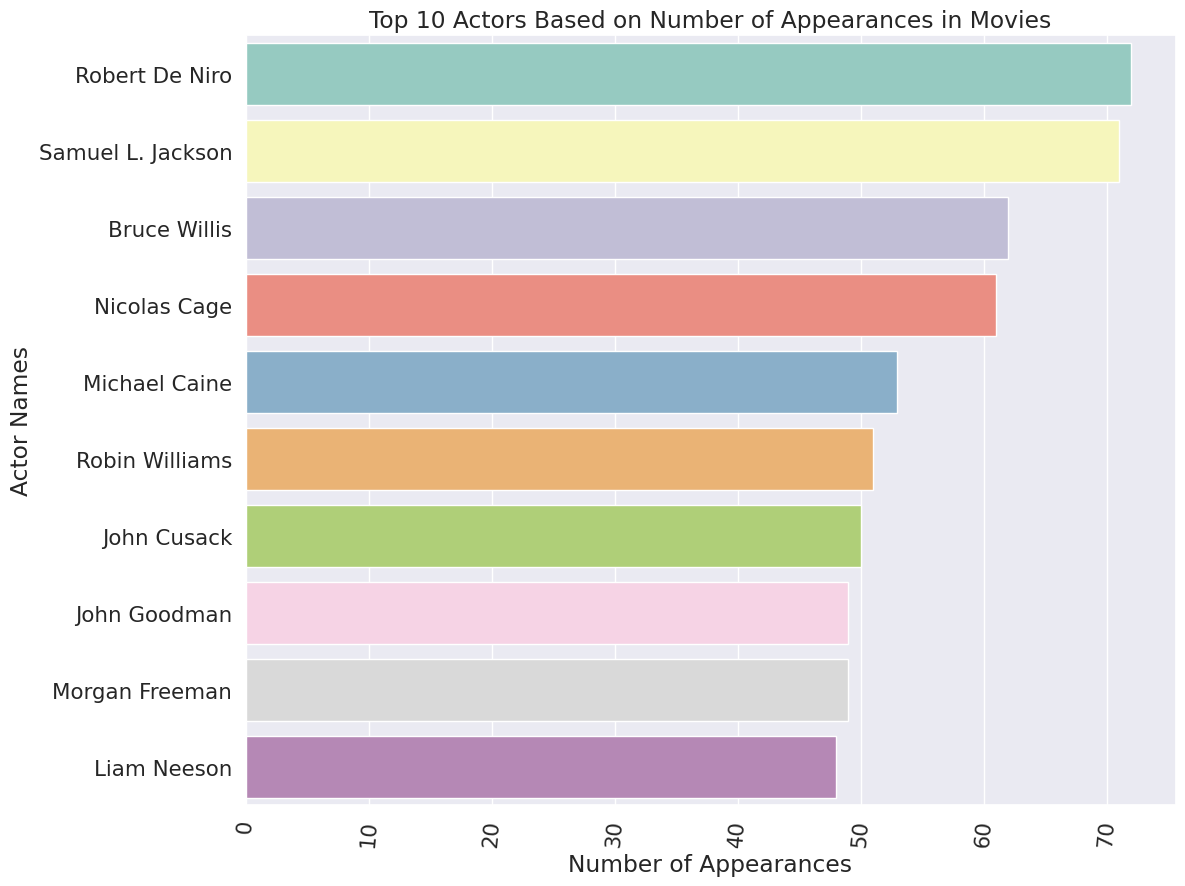

In [ ]:
# 2- Actors Most Appearance
data['cast'] = data['cast'].fillna('')  # Replace NaN values with empty strings
actor_dict = {}
actors = data['cast'].str.split('|')
actors = np.array(actors)
for actorList in actors:
    if isinstance(actorList, list):
        for actor in actorList:
            actor = actor.strip()
            if actor:
                if actor not in actor_dict:
                    actor_dict[actor] = 1
                else:
                    actor_dict[actor] += 1
sorted_actor_dict = sorted(actor_dict.items(), key=operator.itemgetter(1), reverse=True)
x_axis = [item[0] for item in sorted_actor_dict[:10]]
y_axis = [item[1] for item in sorted_actor_dict[:10]]
sns.set(rc={'figure.figsize':(12,10)}, font_scale=1.4)
ax = sns.barplot(x=y_axis, y=x_axis, palette="Set3")
for item in ax.get_xticklabels():
    item.set_rotation(85)
ax.set(xlabel='Number of Appearances', ylabel='Actor Names', title='Top 10 Actors Based on Number of Appearances in Movies')
plt.show()

In [ ]:
# 3-Top 5 Films According to the popularity
movies_and_popularity = data[['original_title','popularity']]
top_movies = movies_and_popularity.sort_values(by="popularity", ascending=False).head(5)
sns.set(rc={'figure.figsize':(12,9)}, font_scale=1.4)
ax = sns.barplot(x='popularity', y='original_title', data=top_movies,palette='viridis')
for item in ax.get_xticklabels():
    item.set_rotation(85)
ax.set(xlabel='Popularity', ylabel='Movie Titles', title='Top 5 Movies Based on Popularity')
plt.show()

<ipython-input-19-c90fe5ef7ec3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='popularity', y='original_title', data=top_movies,palette='viridis')


Genre with the Highest Average Rating: Documentary
Highest Average Rating: 6.908461538461538


<ipython-input-20-1ebd8a25042a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_rating_per_genre.index, y=average_rating_per_genre.values, palette='coolwarm')


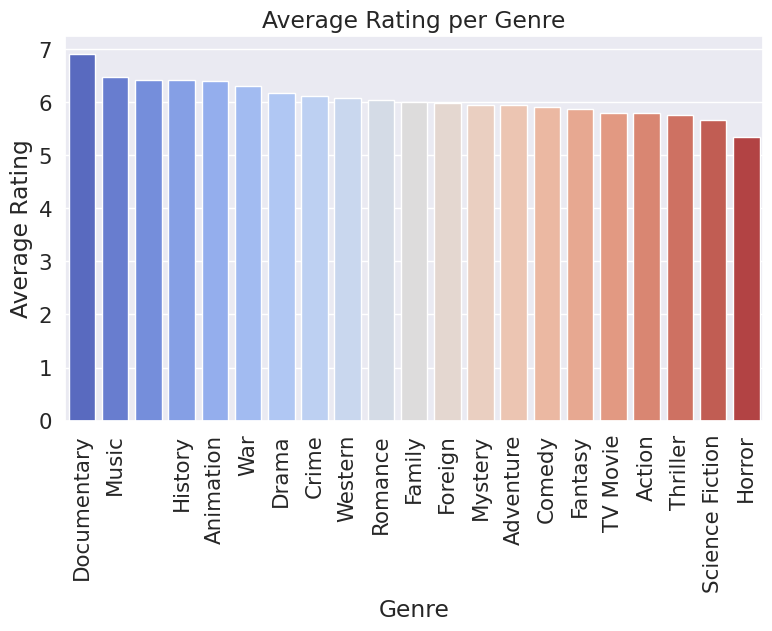

In [ ]:
# 4-Which Genre Has The Highest Average Rating?
data['genres'] = data['genres'].fillna('')
data['genres'] = data['genres'].str.split('|')
data_exploded = data.explode('genres')
average_rating_per_genre = data_exploded.groupby('genres')['vote_average'].mean().sort_values(ascending=False)
highest_avg_genre = average_rating_per_genre.idxmax()
highest_avg_rating = average_rating_per_genre.max()

print(f"Genre with the Highest Average Rating: {highest_avg_genre}")
print(f"Highest Average Rating: {highest_avg_rating}")
plt.figure(figsize=(9, 5))
sns.barplot(x=average_rating_per_genre.index, y=average_rating_per_genre.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average Rating per Genre')
plt.show()


<ipython-input-21-1f8a66f5d199>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=budget_distribution.index, y=budget_distribution.values, palette='pastel')


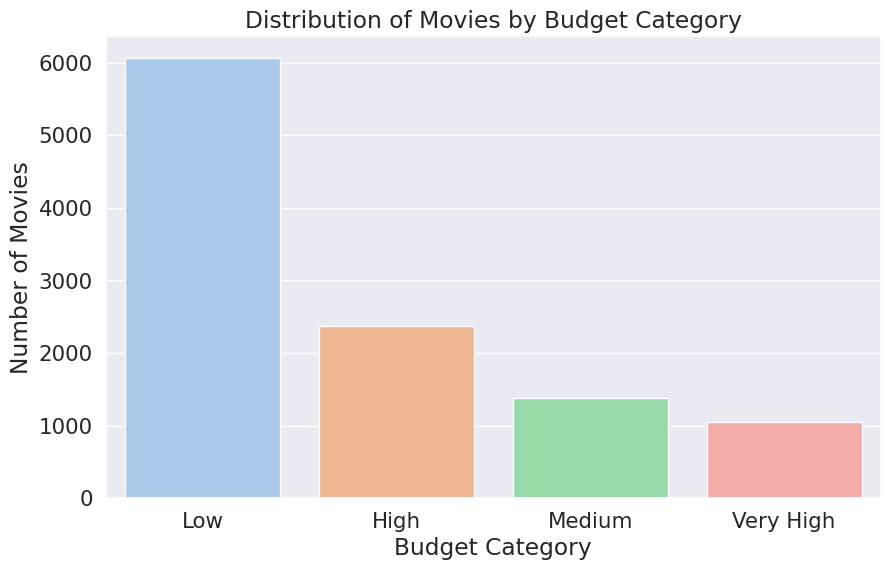

In [ ]:
# 5-Distribution of Movies by Budget Categories
def categorize_budget(budget):
    if budget < 1_000_000:
        return 'Low'
    elif budget < 10_000_000:
        return 'Medium'
    elif budget < 50_000_000:
        return 'High'
    else:
        return 'Very High'
data['budget_category'] = data['budget'].apply(categorize_budget)
budget_distribution = data['budget_category'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=budget_distribution.index, y=budget_distribution.values, palette='pastel')
plt.xlabel('Budget Category')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movies by Budget Category')
plt.show()

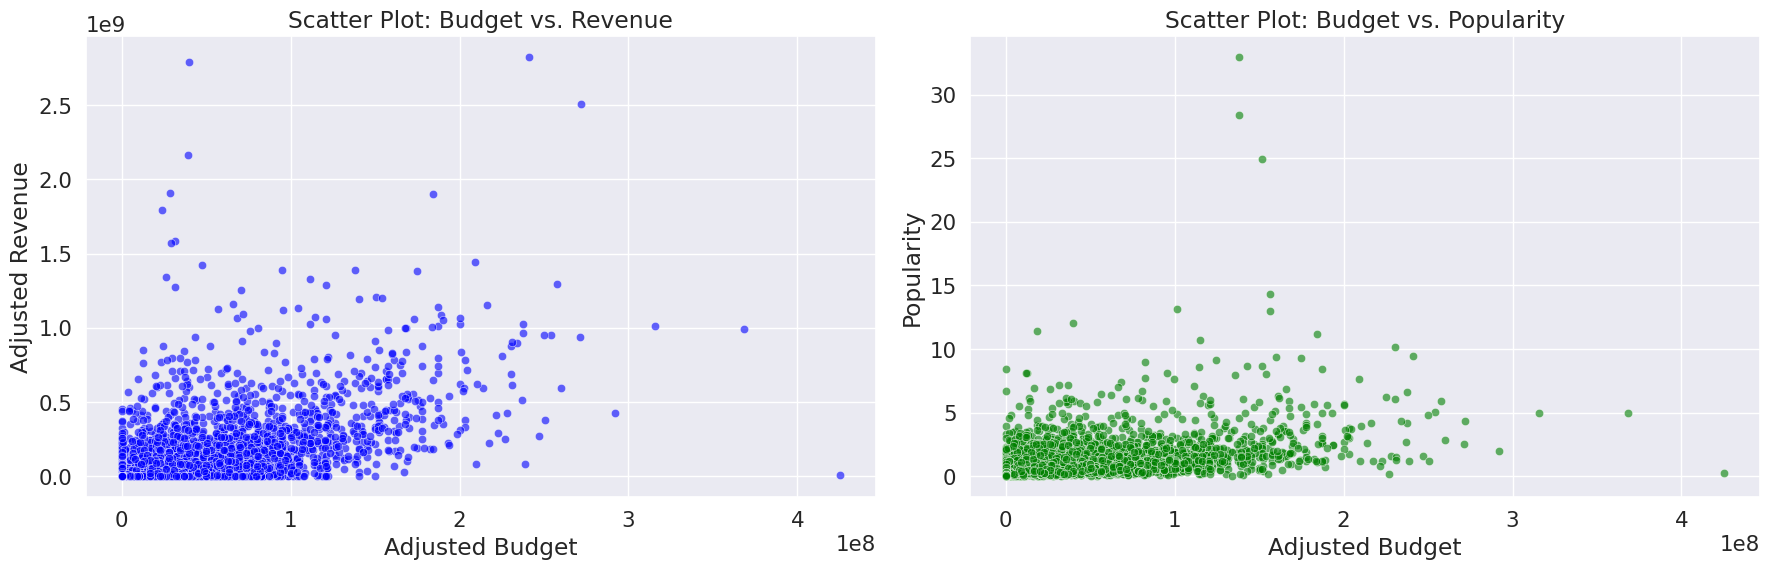

In [ ]:
# 6- Correlation charts between budjet, popularity and Revenue
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
# Scatter plot for budget_adj vs. revenue_adj
sns.scatterplot(x='budget_adj', y='revenue_adj', data=data, color='blue', alpha=0.6, ax=axs[0])
axs[0].set_title('Scatter Plot: Budget vs. Revenue')
axs[0].set_xlabel('Adjusted Budget')
axs[0].set_ylabel('Adjusted Revenue')
axs[0].grid(True)
# Scatter plot for budget_adj vs. popularity
sns.scatterplot(x='budget_adj', y='popularity', data=data, color='green', alpha=0.6, ax=axs[1])
axs[1].set_title('Scatter Plot: Budget vs. Popularity')
axs[1].set_xlabel('Adjusted Budget')
axs[1].set_ylabel('Popularity')
axs[1].grid(True)
# Adjust layout
plt.tight_layout()
plt.show()